# Automobile Dataset — Regularization Activity

This notebook uses the **Automobile dataset** from UCI ML Repository:  
[Automobile Dataset (imports-85.data)](https://archive.ics.uci.edu/ml/datasets/Automobile)

We will treat this as a **regression problem**, predicting **price** from technical and categorical features.

## Steps:
1. Load dataset with appropriate headers (since the original file has none).
2. Preprocess: 
   - One-hot encode categorical features.
   - Scale numerical features.
3. Train and compare:
   - **Linear Regression**
   - **Ridge Regression**
   - **Lasso Regression**
   - **ElasticNet** (bonus)
4. Evaluate using **R²** scores on train/test sets and plot results.

---

## Important
- Download the dataset file (`imports-85.data`) from UCI and set the path in the `CSV_PATH` variable below.


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

c:\ProgramData\anaconda3\envs\mi_ambiente\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\ProgramData\anaconda3\envs\mi_ambiente\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\ProgramData\anaconda3\envs\mi_ambiente\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\ProgramData\anaconda3\envs\mi_ambiente\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\ProgramData\anaconda3\envs\mi

         model     alpha  R2_train   R2_test
0   ElasticNet    0.0001  0.980676  0.806871
1   ElasticNet    0.0010  0.979723  0.794193
2   ElasticNet    0.0100  0.970896  0.728920
3   ElasticNet    0.1000  0.940483  0.682504
4   ElasticNet    1.0000  0.868381  0.701834
5   ElasticNet   10.0000  0.687119  0.706607
6   ElasticNet  100.0000  0.195794  0.208935
7        Lasso    0.0001  0.980711  0.809810
8        Lasso    0.0010  0.980711  0.809887
9        Lasso    0.0100  0.980711  0.806561
10       Lasso    0.1000  0.980702  0.805403
11       Lasso    1.0000  0.980062  0.797363
12       Lasso   10.0000  0.968544  0.717775
13       Lasso  100.0000  0.909992  0.646007
14      Linear    0.0000  0.980711  0.808083
15       Ridge    0.0001  0.980711  0.808067
16       Ridge    0.0010  0.980710  0.807915
17       Ridge    0.0100  0.980636  0.806084
18       Ridge    0.1000  0.979029  0.786929
19       Ridge    1.0000  0.967039  0.711527
20       Ridge   10.0000  0.929917  0.686967
21       R

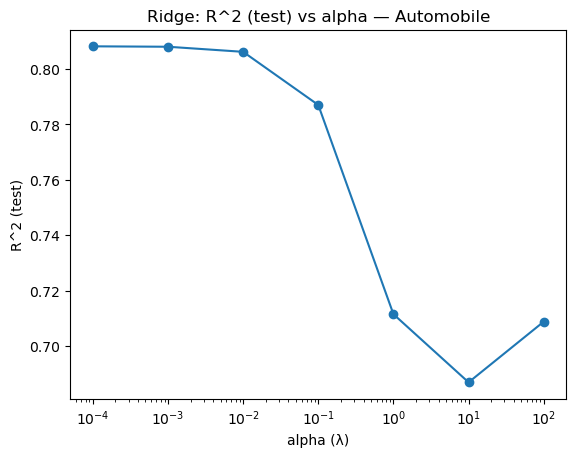

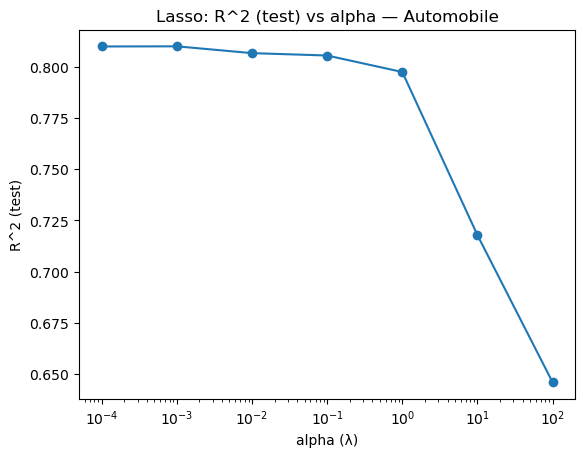

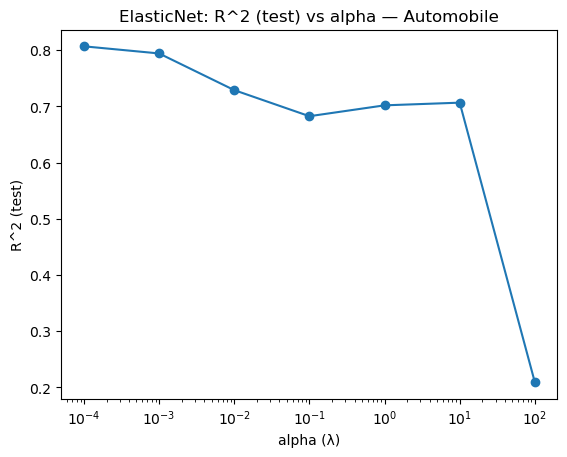

Linear Regression R^2 (test): 0.8080831831623129


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Mostrar tabla en ChatGPT (ignorado fuera)
try:
    from caas_jupyter_tools import display_dataframe_to_user
except Exception:
    display_dataframe_to_user = None

# --- CONFIG ---
CSV_PATH = r'C:\Users\Usuario\Downloads\automobile\imports-85.data'

# Column headers from UCI docs
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]

if CSV_PATH is None:
    raise ValueError("Please set CSV_PATH to your local imports-85.data file.")

# Load data (handle missing values marked as '?')
df = pd.read_csv(CSV_PATH, names=headers, na_values='?')

# Drop rows with missing target (price)
df = df.dropna(subset=['price'])

# Convert numeric columns to float
numeric_cols = ["symboling","normalized-losses","wheel-base","length","width",
                "height","curb-weight","engine-size","bore","stroke",
                "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows still with NaN (missing values)
df = df.dropna()

# Define features and target
X = df.drop("price", axis=1)
y = df["price"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Categorical vs numeric split
categorical_cols = [c for c in X.columns if c not in numeric_cols]
numeric_features = [c for c in X.columns if c in numeric_cols]

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_cols),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='drop'
)

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
results = []

# Linear
lin = Pipeline(steps=[('prep', preprocess),
                     ('model', LinearRegression())])
lin.fit(X_train, y_train)
results.append({"model":"Linear","alpha":0.0,
                "R2_train": lin.score(X_train,y_train),
                "R2_test": lin.score(X_test,y_test)})

# Ridge
for a in alphas:
    ridge = Pipeline(steps=[('prep', preprocess),
                           ('model', Ridge(alpha=a, random_state=42))])
    ridge.fit(X_train, y_train)
    results.append({"model":"Ridge","alpha":a,
                    "R2_train": ridge.score(X_train,y_train),
                    "R2_test": ridge.score(X_test,y_test)})

# Lasso
for a in alphas:
    lasso = Pipeline(steps=[('prep', preprocess),
                           ('model', Lasso(alpha=a, random_state=42, max_iter=20000))])
    lasso.fit(X_train, y_train)
    results.append({"model":"Lasso","alpha":a,
                    "R2_train": lasso.score(X_train,y_train),
                    "R2_test": lasso.score(X_test,y_test)})

# ElasticNet
for a in alphas:
    en = Pipeline(steps=[('prep', preprocess),
                        ('model', ElasticNet(alpha=a, l1_ratio=0.5, random_state=42, max_iter=20000))])
    en.fit(X_train, y_train)
    results.append({"model":"ElasticNet","alpha":a,
                    "R2_train": en.score(X_train,y_train),
                    "R2_test": en.score(X_test,y_test)})

res_df = pd.DataFrame(results).sort_values(["model","alpha"]).reset_index(drop=True)

# Mostrar tabla (intenta en ChatGPT, si no, imprime)
if display_dataframe_to_user:
    display_dataframe_to_user("Automobile — R2 scores", res_df)
else:
    print(res_df)

# Plots
for mdl in ["Ridge","Lasso","ElasticNet"]:
    sub = res_df[res_df["model"]==mdl].sort_values("alpha")
    plt.figure()
    plt.semilogx(sub["alpha"].values, sub["R2_test"].values, marker="o")
    plt.title(f"{mdl}: R^2 (test) vs alpha — Automobile")
    plt.xlabel("alpha (λ)")
    plt.ylabel("R^2 (test)")
    plt.show()

print("Linear Regression R^2 (test):", res_df[res_df["model"]=="Linear"]["R2_test"].iloc[0])


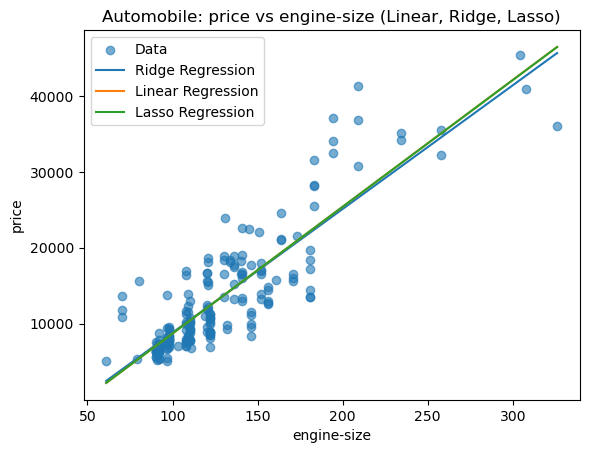

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

CSV_PATH = r'C:\Users\Usuario\Downloads\automobile\imports-85.data'

# Carga Automobile (imports-85.data) con headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration",
           "num-of-doors","body-style","drive-wheels","engine-location",
           "wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system",
           "bore","stroke","compression-ratio","horsepower","peak-rpm",
           "city-mpg","highway-mpg","price"]
df = pd.read_csv(CSV_PATH, names=headers, na_values="?")

# Limpieza mínima
df = df.dropna(subset=["price","engine-size"])
df["price"] = pd.to_numeric(df["price"])
df["engine-size"] = pd.to_numeric(df["engine-size"])

# Usamos UNA sola característica para poder graficar en 2D
X = df[["engine-size"]].values
y = df["price"].values

# Modelos (escalamos X para regularización estable)
lin = Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())])
rid = Pipeline([("scaler", StandardScaler()), ("model", Ridge(alpha=5.0, random_state=42))])
las = Pipeline([("scaler", StandardScaler()), ("model", Lasso(alpha=3.0, random_state=42, max_iter=100000))])

lin.fit(X, y)
rid.fit(X, y)
las.fit(X, y)

# Grid para líneas
xg = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
yg_lin = lin.predict(xg)
yg_rid = rid.predict(xg)
yg_las = las.predict(xg)

# Scatter + líneas
plt.figure()
plt.scatter(X, y, alpha=0.6, label="Data")
plt.plot(xg, yg_rid, label="Ridge Regression")
plt.plot(xg, yg_lin, label="Linear Regression")
plt.plot(xg, yg_las, label="Lasso Regression")
plt.xlabel("engine-size")
plt.ylabel("price")
plt.legend()
plt.title("Automobile: price vs engine-size (Linear, Ridge, Lasso)")
plt.show()
